<a href="https://colab.research.google.com/github/Ragulan-K/FYP/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PV SOLAR POWER PLANT

In This project leverages machine learning to enhance the analysis and classification of solar power plants. The primary objectives are to optimize the performance monitoring, fault detection, and overall management of solar power plants through advanced data analytics.
Key Components:
Data Collection and Preprocessing:
Gathered extensive datasets from various solar power plants, including meteorological data (solar irradiance, temperature, wind speed) and operational data (energy output, panel efficiency).
Preprocessed the data to handle missing values, normalize features, and create time-series inputs.
Feature Engineering:
Developed new features from raw data to capture intricate patterns. Examples include lagged features, moving averages, and weather condition indices.
Model Development:
Employed various machine learning algorithms such as Random Forest, Gradient Boosting, and Neural Networks to classify and predict the performance of solar power plants.
Used techniques like cross-validation and grid search to fine-tune hyperparameters for optimal model performance.
Classification and Prediction:
Implemented classification models to categorize solar plants based on performance metrics (e.g., high, medium, low efficiency).
Developed predictive models to forecast future energy output and identify potential faults or inefficiencies.
Evaluation and Validation:
Assessed model accuracy using metrics like precision, recall, F1 score, and mean absolute error.
Validated models using a separate test set to ensure robustness and generalizability.

1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',3)

2.  Importing Power Generation & Weather Sensor Data

In [7]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')

In [6]:
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

In [9]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
39297,2020-06-04 13:15:00,4136001,81aHJ1q11NBPMrL,1239.473333,1209.120000,4050.600000,1215407795.600000
49837,2020-06-09 13:00:00,4136001,Et9kgGMDl729KT4,0.000000,0.000000,2135.000000,1824108.000000
14881,2020-05-22 16:30:00,4136001,Quc1TzYxW2pYoWX,419.046667,411.653333,3346.800000,329538914.800000
36516,2020-06-03 05:15:00,4136001,mqwcsP2rE7J0TFp,0.000000,0.000000,0.000000,593724066.000000
19075,2020-05-25 02:45:00,4136001,Quc1TzYxW2pYoWX,0.000000,0.000000,4816.000000,329548069.000000


In [10]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1385,2020-05-29 10:45:00,4136001,iq8k7ZNt4Mwm3w0,30.793403,47.352664,0.706742
763,2020-05-22 23:15:00,4136001,iq8k7ZNt4Mwm3w0,27.417019,25.288167,0.000000
1492,2020-05-30 13:45:00,4136001,iq8k7ZNt4Mwm3w0,36.170829,55.448997,0.850088
1033,2020-05-25 18:45:00,4136001,iq8k7ZNt4Mwm3w0,34.163542,31.612183,0.000692
1257,2020-05-28 02:45:00,4136001,iq8k7ZNt4Mwm3w0,25.821884,24.596159,0.000000


3. Adjust datetime format

In [12]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

4. Merging generation data and weather sensor data

In [13]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
33685,2020-06-01 21:00:00,xoJJ8DcxJEcupym,0.000000,0.000000,4208.000000,209244064.000000,23.332743,23.007589,0.000000
26473,2020-05-29 09:30:00,Quc1TzYxW2pYoWX,0.000000,0.000000,898.000000,329571759.000000,29.044032,45.565119,0.786088
20586,2020-05-25 23:45:00,Qf4GUc1pJu5T6c6,0.000000,0.000000,7324.800000,838504492.000000,28.205333,27.197260,0.000000
33910,2020-06-01 23:45:00,IQ2d7wF4YD8zU1Q,0.000000,0.000000,4256.000000,20082274.000000,23.643209,23.095739,0.000000
50823,2020-06-10 00:00:00,xoJJ8DcxJEcupym,0.000000,0.000000,6993.000000,209292803.000000,25.437388,24.202458,0.000000


5. Adding separate time and date columns

In [16]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [17]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  WEEK                 67698 non-

In [18]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

There is no Missing Values in the dataset

In [19]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,30.000000,720.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,45.000000,1080.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000
std,nan,370.569597,362.112118,2919.448386,729667771.073241,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,16.764084,415.672274


6. Converting 'SOURCE_KEY' from categorical form to numerical form

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


##DATA VISUALIZATION

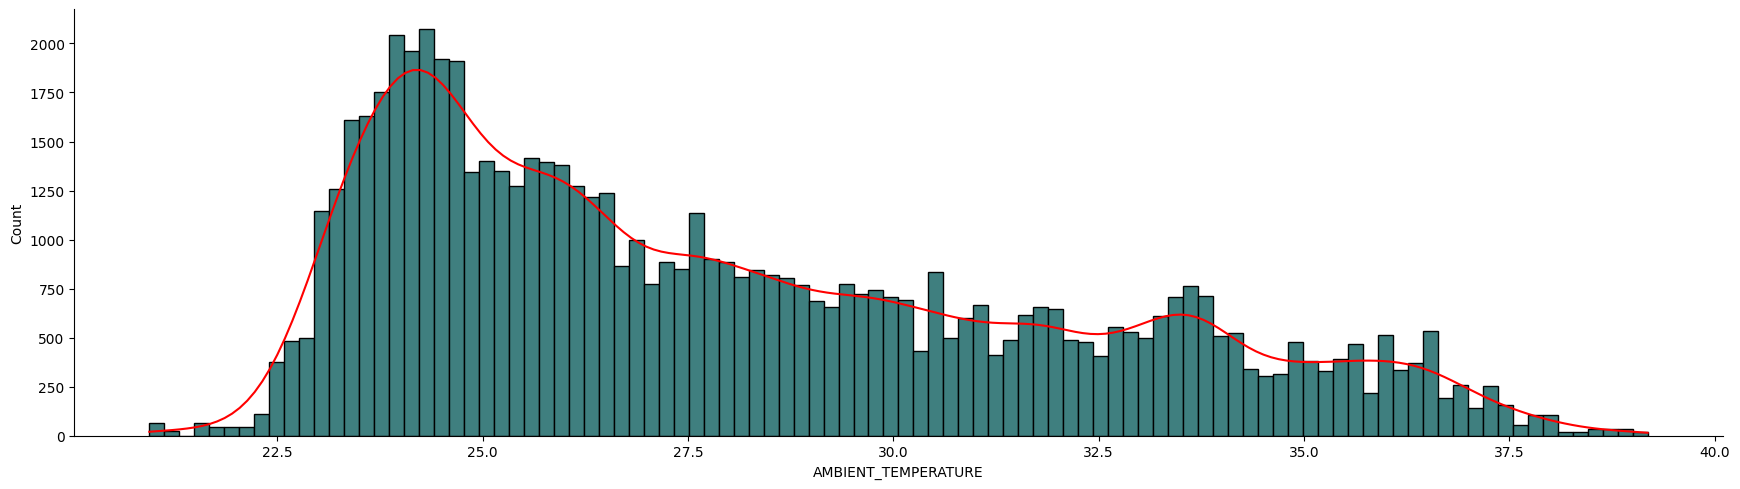

In [21]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [22]:
df_solar['DATE'].nunique()

34

The data of solar power generation is of 34 days

##Faults & Abnormalities detection in solar power plant generation

7. Multiple Plotting of DC_POWER generation on per day basis.

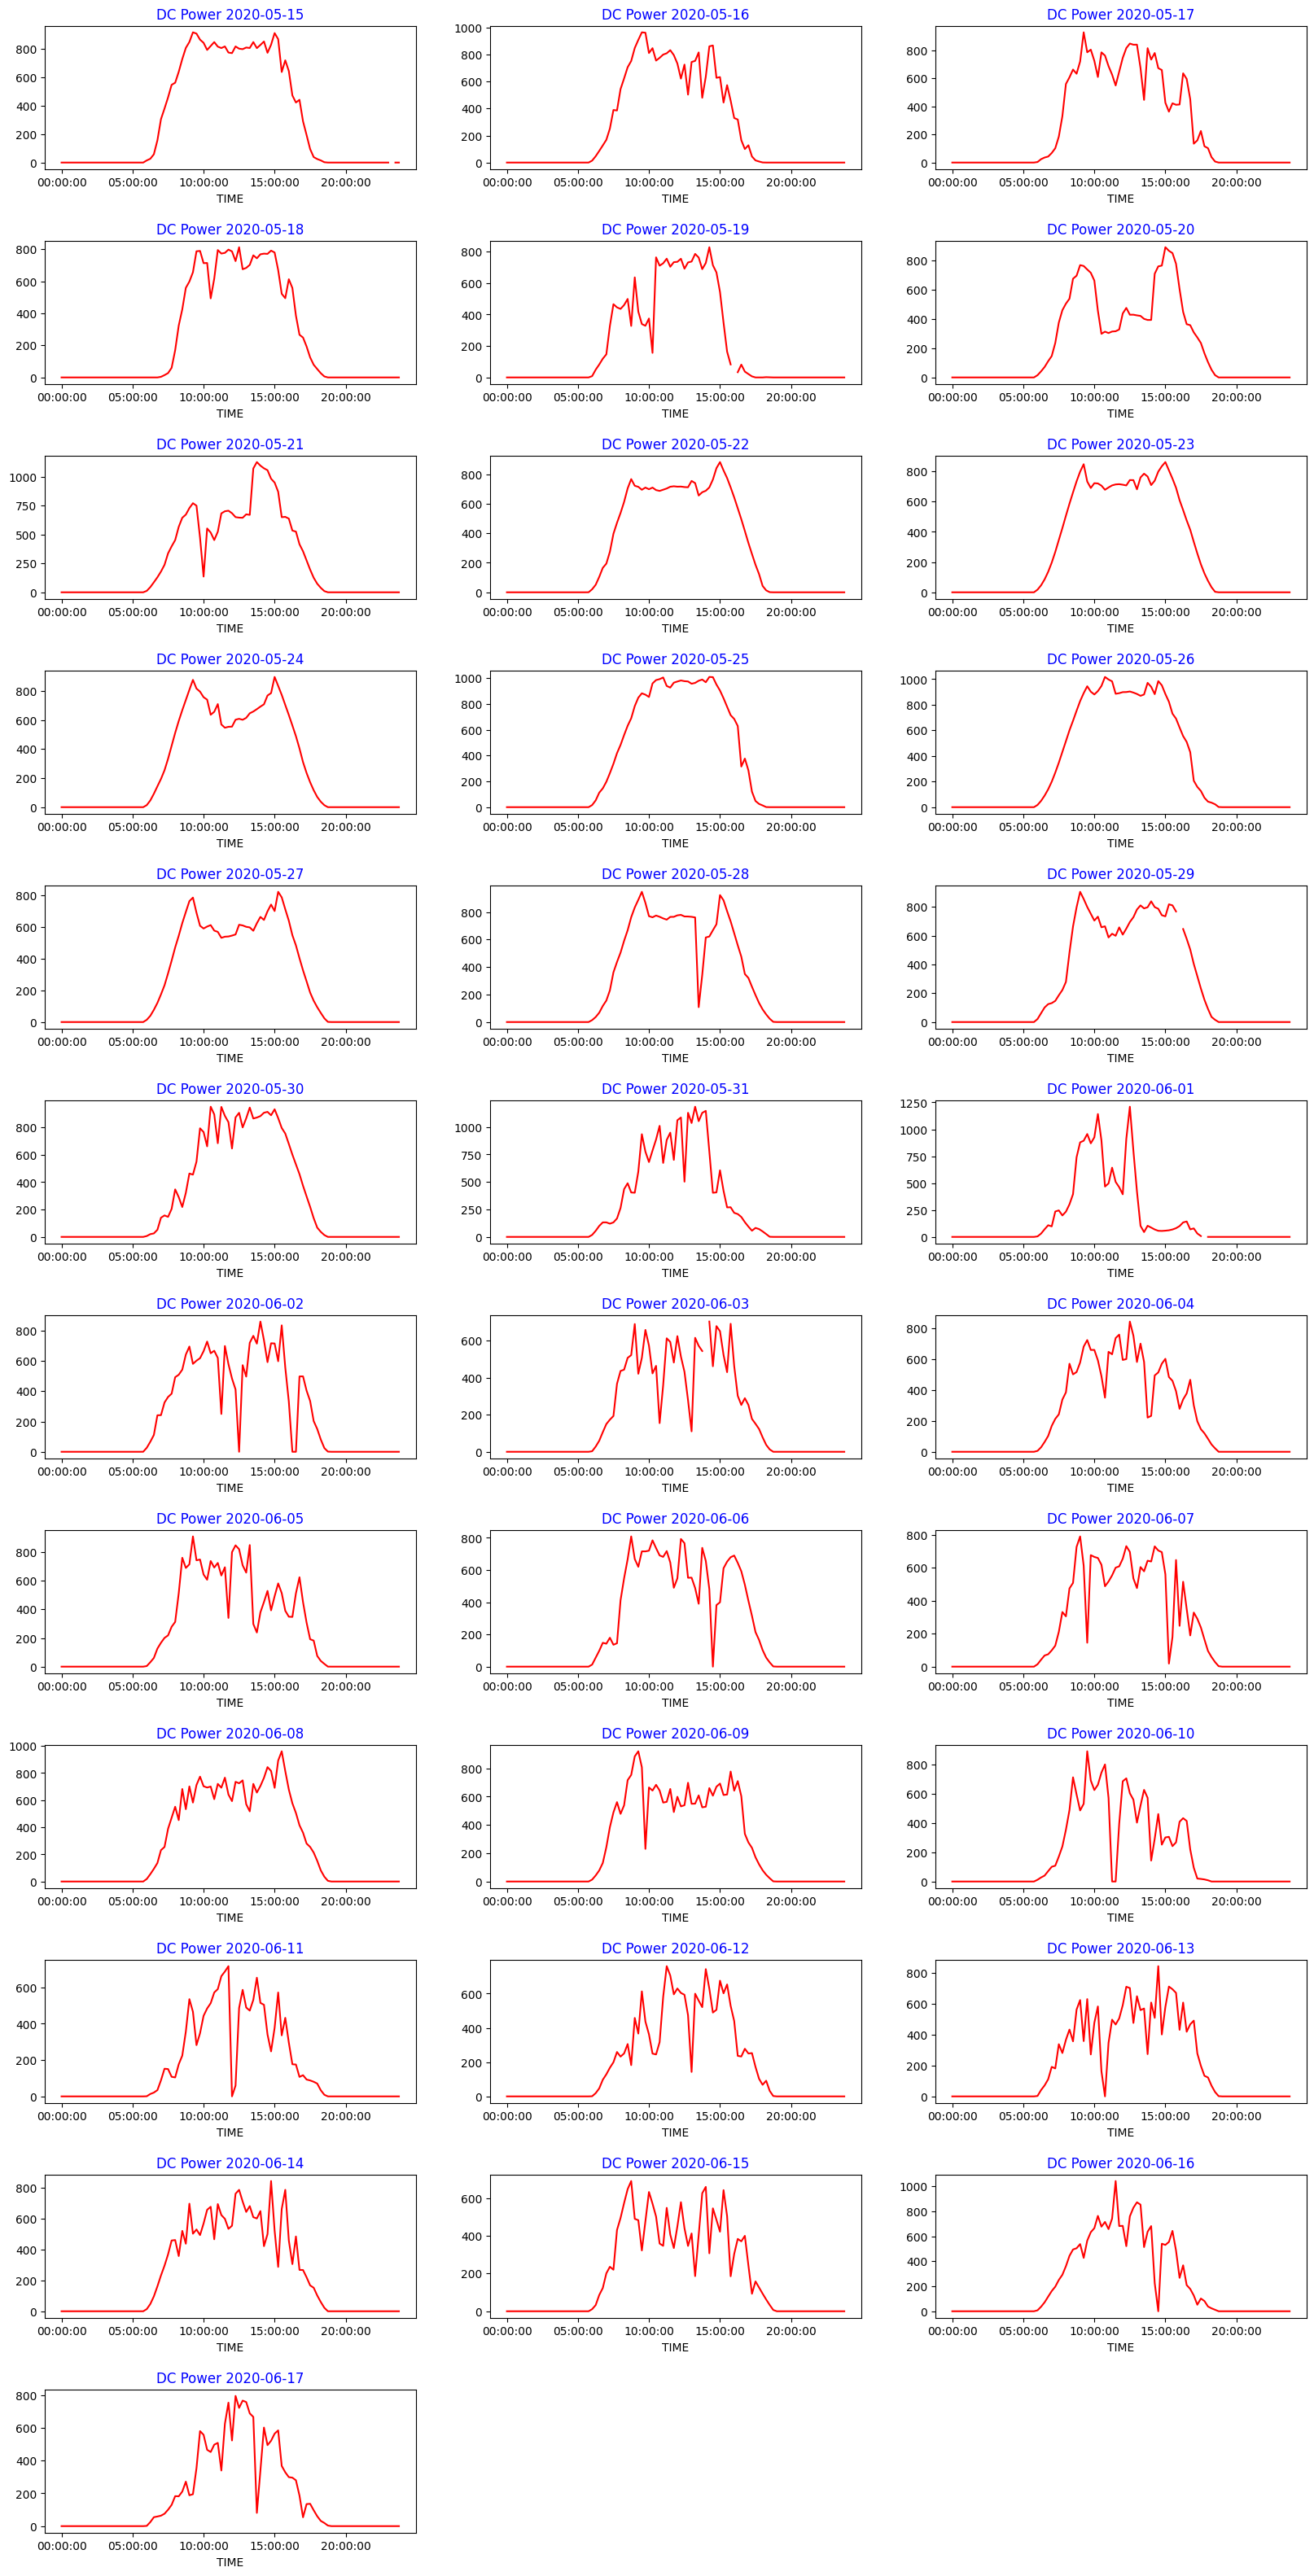

In [23]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

##Abnormalities in DC_POWER Generation

Form the per day DC_POWER generation graph we can find that, most of the days there is a some fluctuation in the power generation.

Less Fluctuation in DC_POWER generation is observed in these days.

1. 2020-05-15
2. 2020-05-18
3. 2020-05-22
4. 2020-05-23
5. 2020-05-24
6. 2020-05-25
7. 2020-05-26

High Fluctuation in DC_POWER generation is observed in these days.

1. 2020-05-19
2. 2020-05-28
3. 2020-05-29
4. 2020-06-02
5. 2020-06-03
6. 2020-06-04
7. 2020-06-13
8. 2020-06-14
9. 2020-06-17

Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.

1. 2020-06-03
2. 2020-06-11
3. 2020-06-12
4. 2020-06-15

Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further

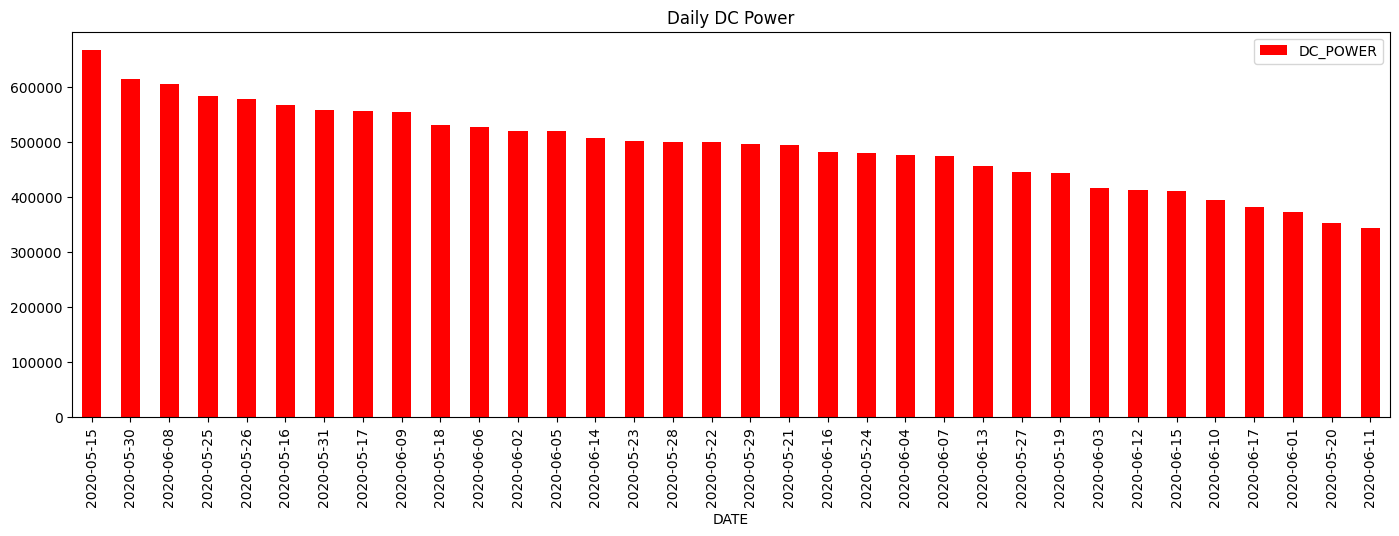

In [24]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

Form the per day DC_POWER generation graph we can find the average power generation per day.

Highest average DC_POWER Generation is on: 2020-05-15

Lowest average DC_POWER Generation is on : 2020-06-11

8. Multiple Plotting of IRRADIATION generation on per day basis.

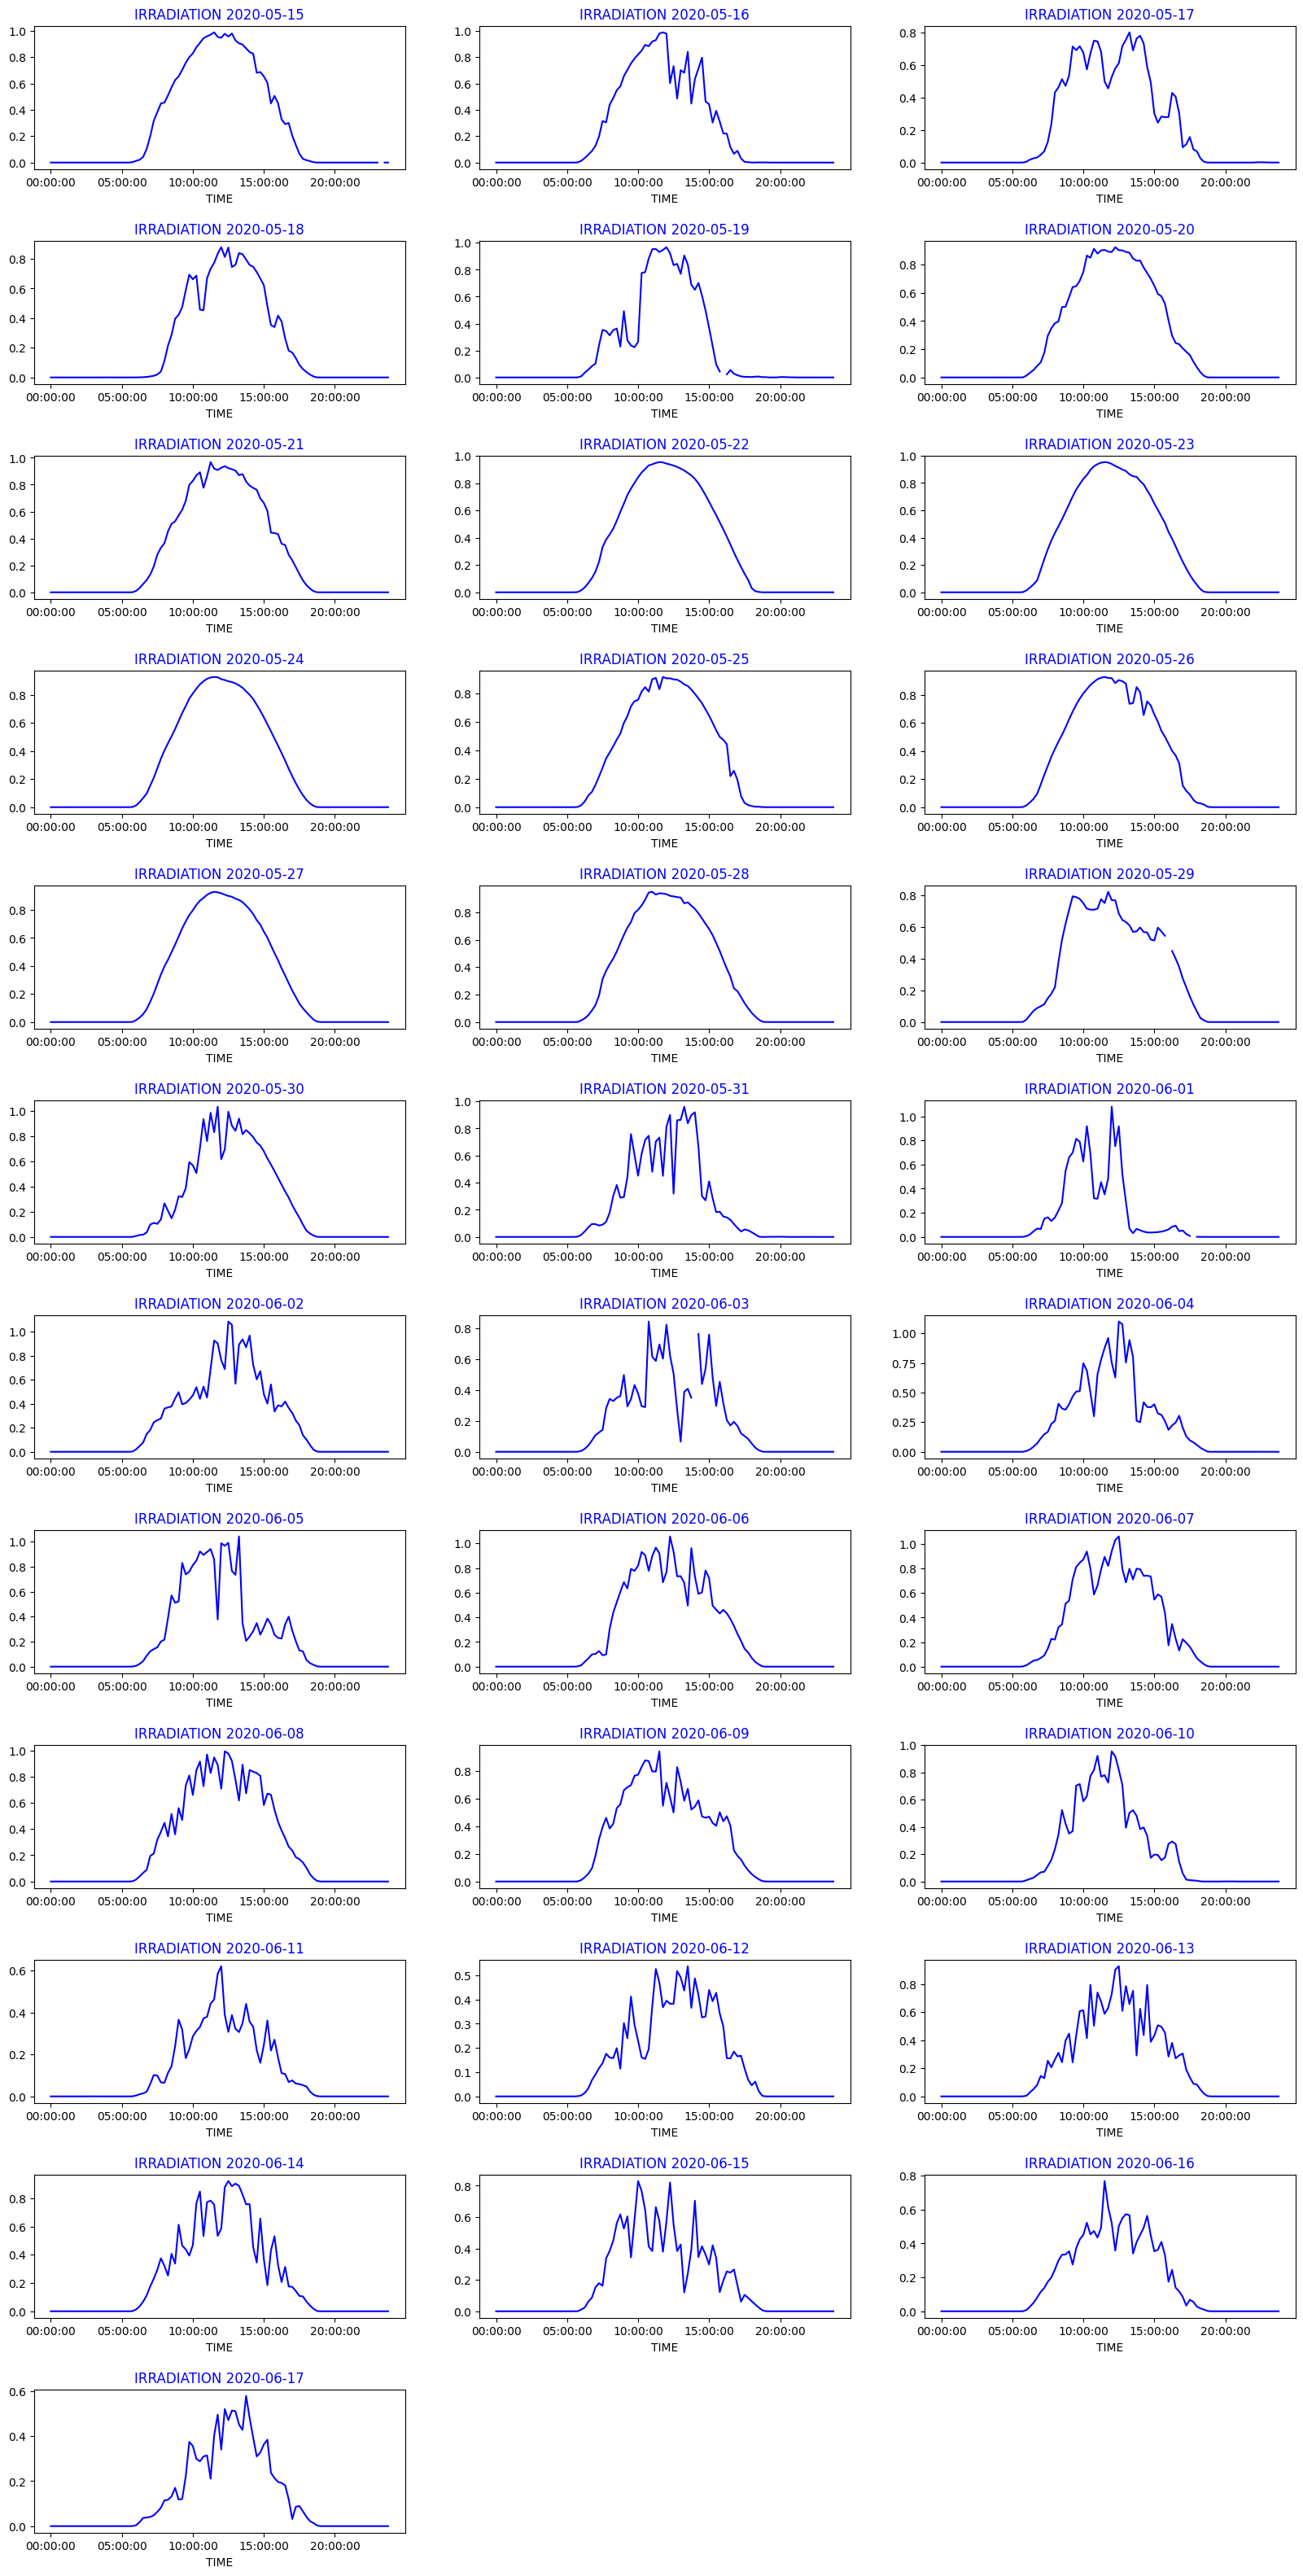

In [25]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

IRRADIATION graph pattern is looking very similar to the corresponding DC_POWER generation on per day basis.

In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

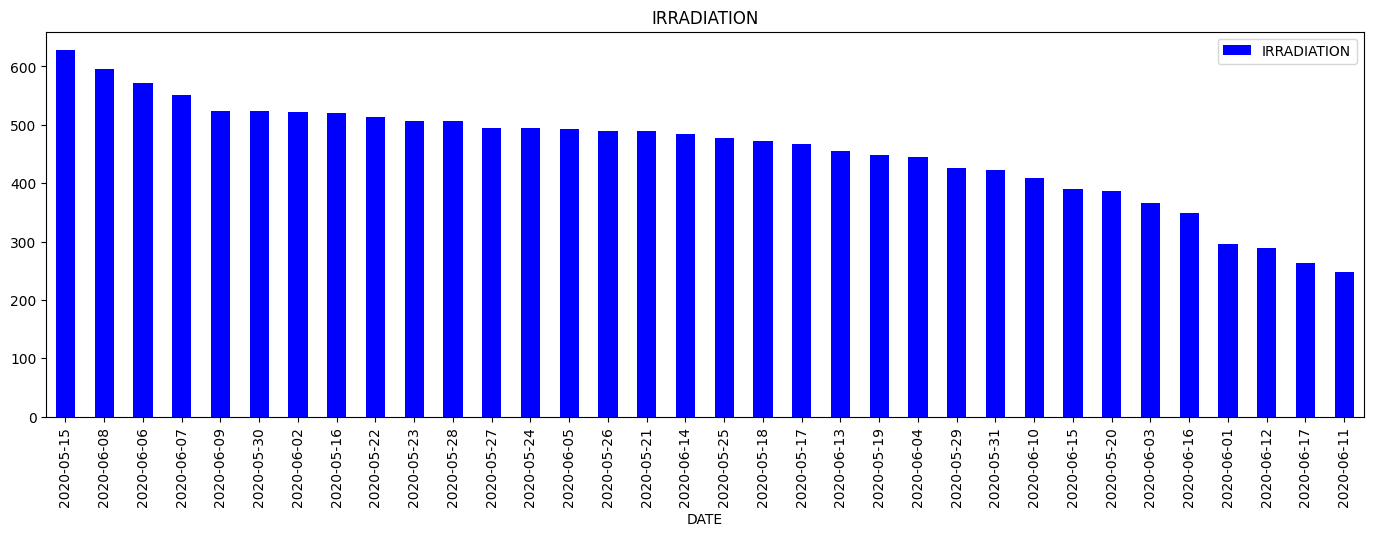

In [26]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

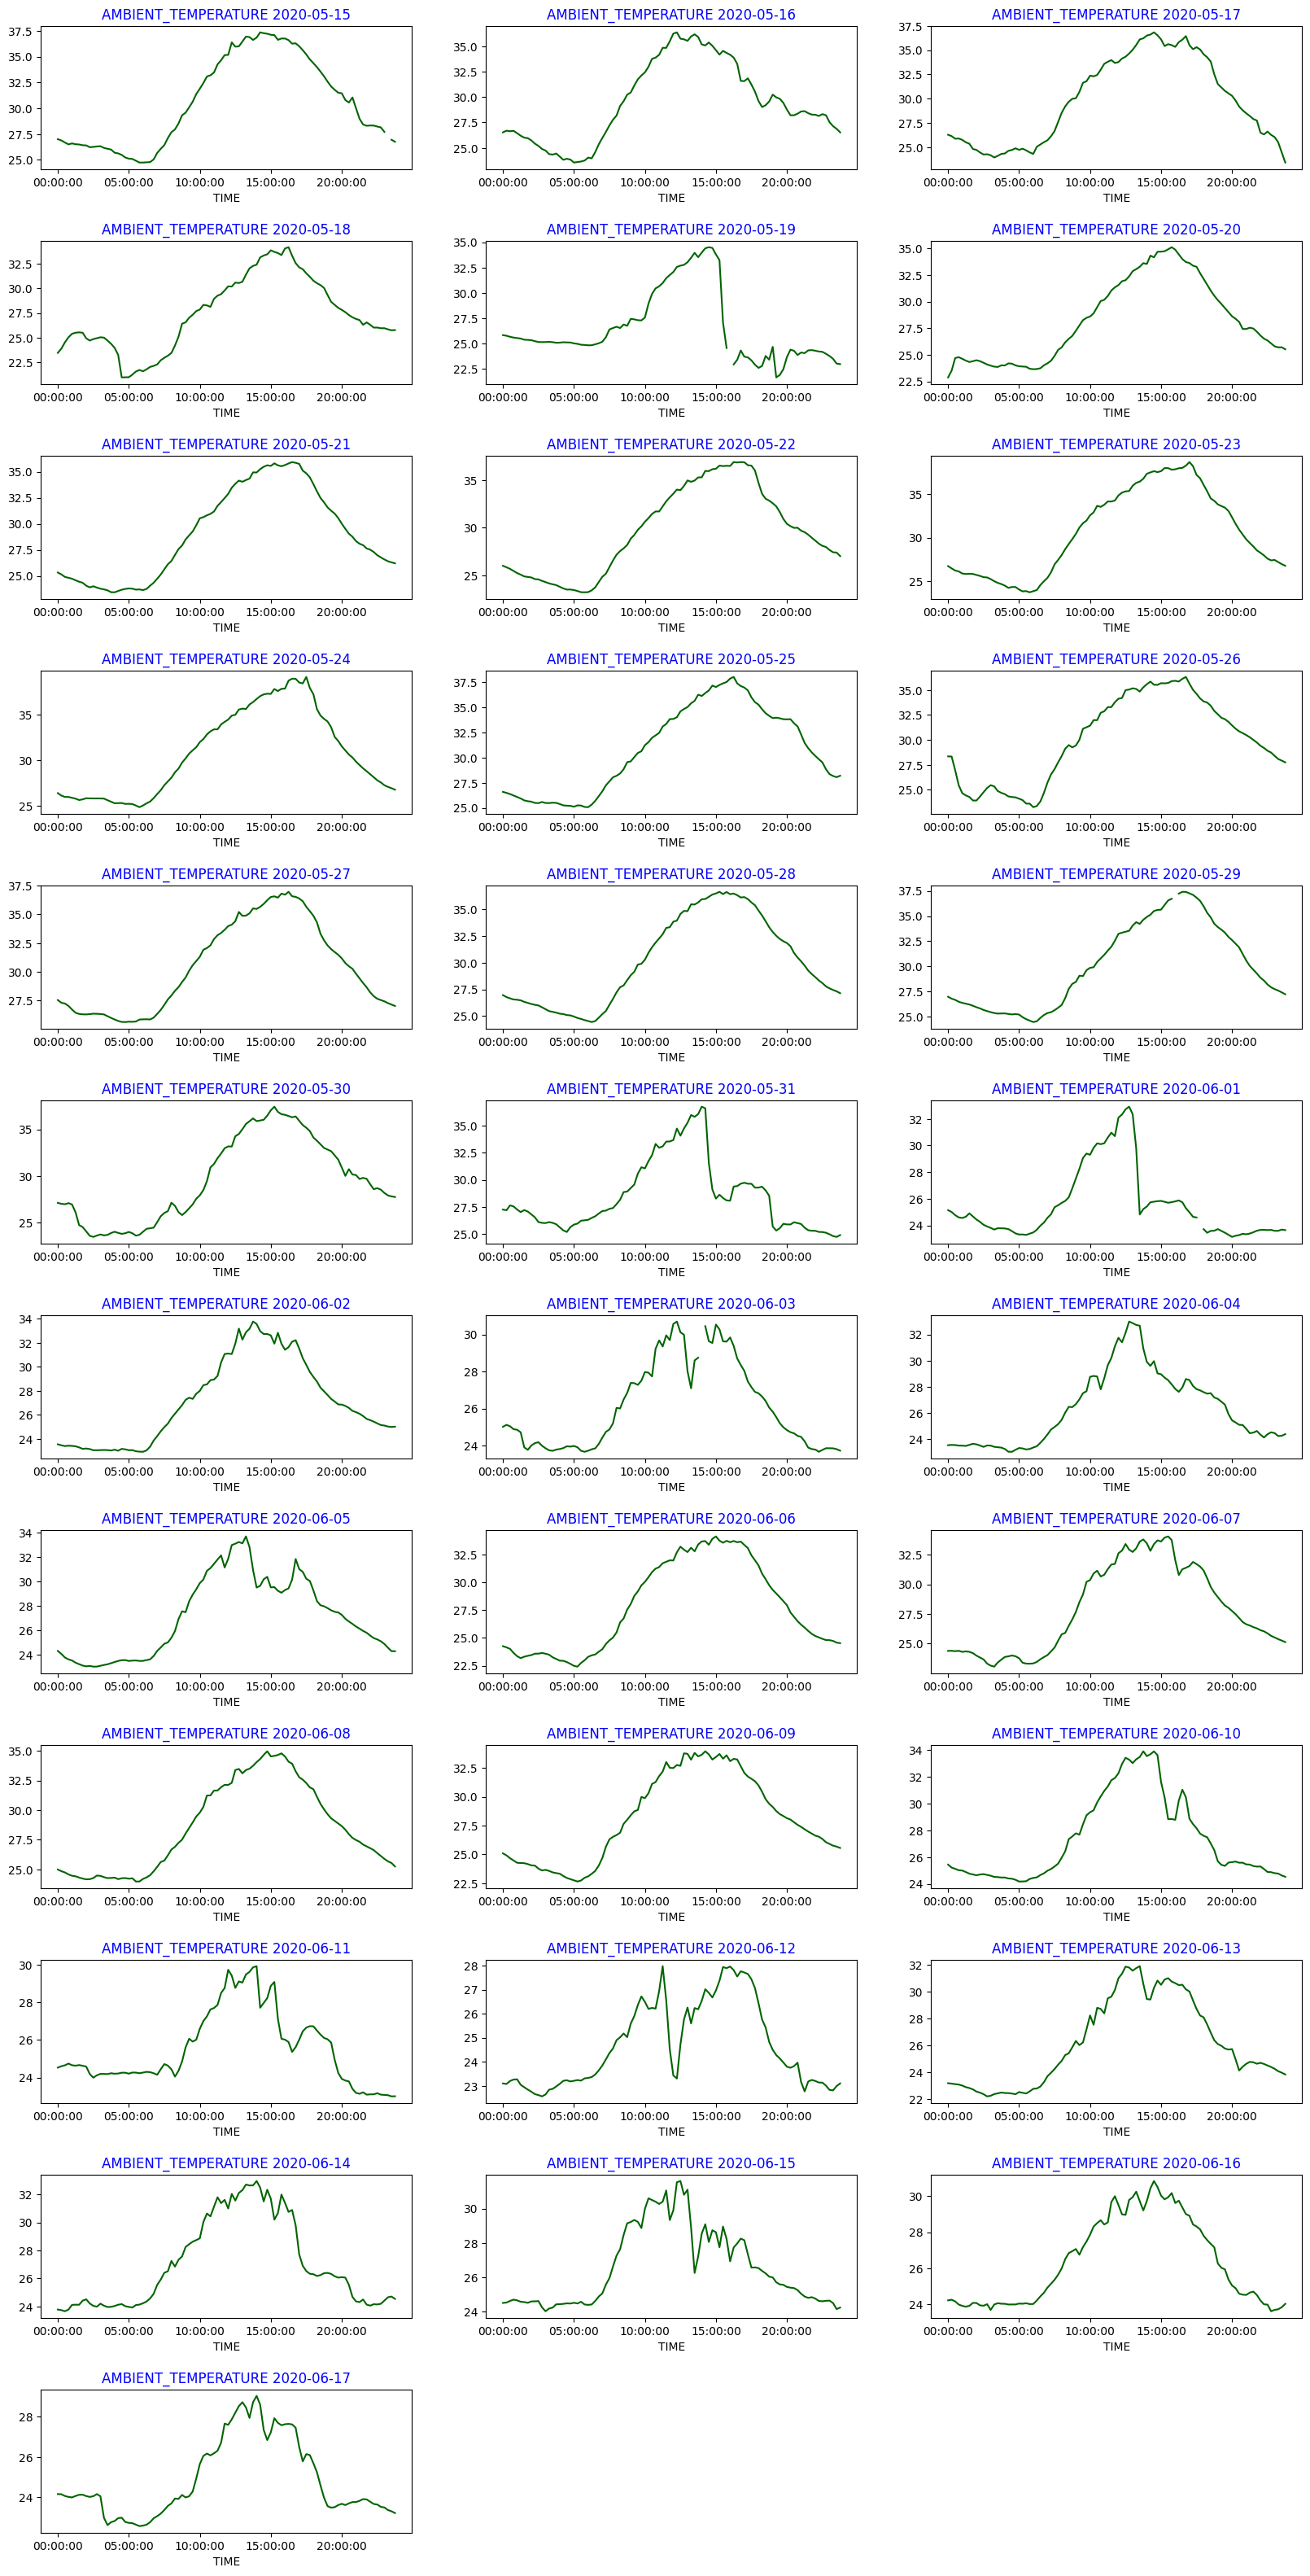

In [27]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

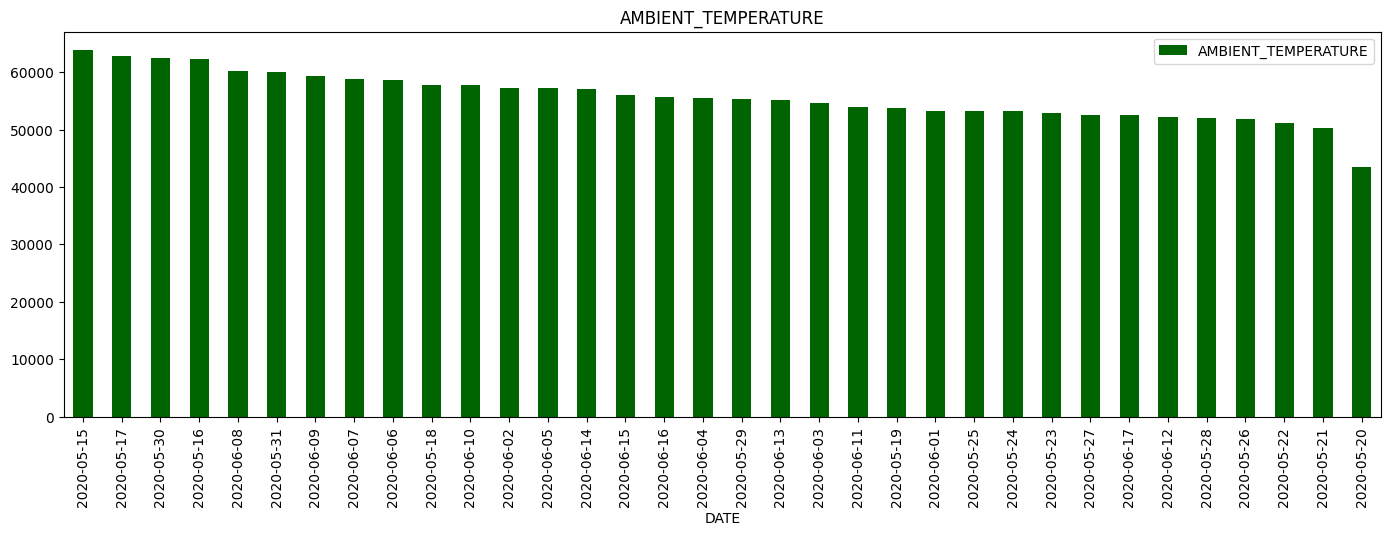

In [28]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

##Best and Worst Power generation comparision:

Major Environmental Factors affecting the of solar power generation are.

1. The thickness of clouds is also a factor in how much sunlight your solar panels can soak up. We may see thicker clouds in winter too and this is something else to look out for. It’s hard for sunlight to travel through thick clouds, which will affect your solar power system’s output.
2. While we’ve looked at the sun’s positioning and how it can affect output, there’s another factor to consider when your system may not be performing at its maximum… even at midday.
3. Solar panel temperature is the number one reason behind your solar power system not achieving peak performance
4. Solar power generation is directly depends on Irradiation comming from the sun.

9. Highest average DC_POWER is generated on "2020-05-15"

<Figure size 1600x1600 with 0 Axes>

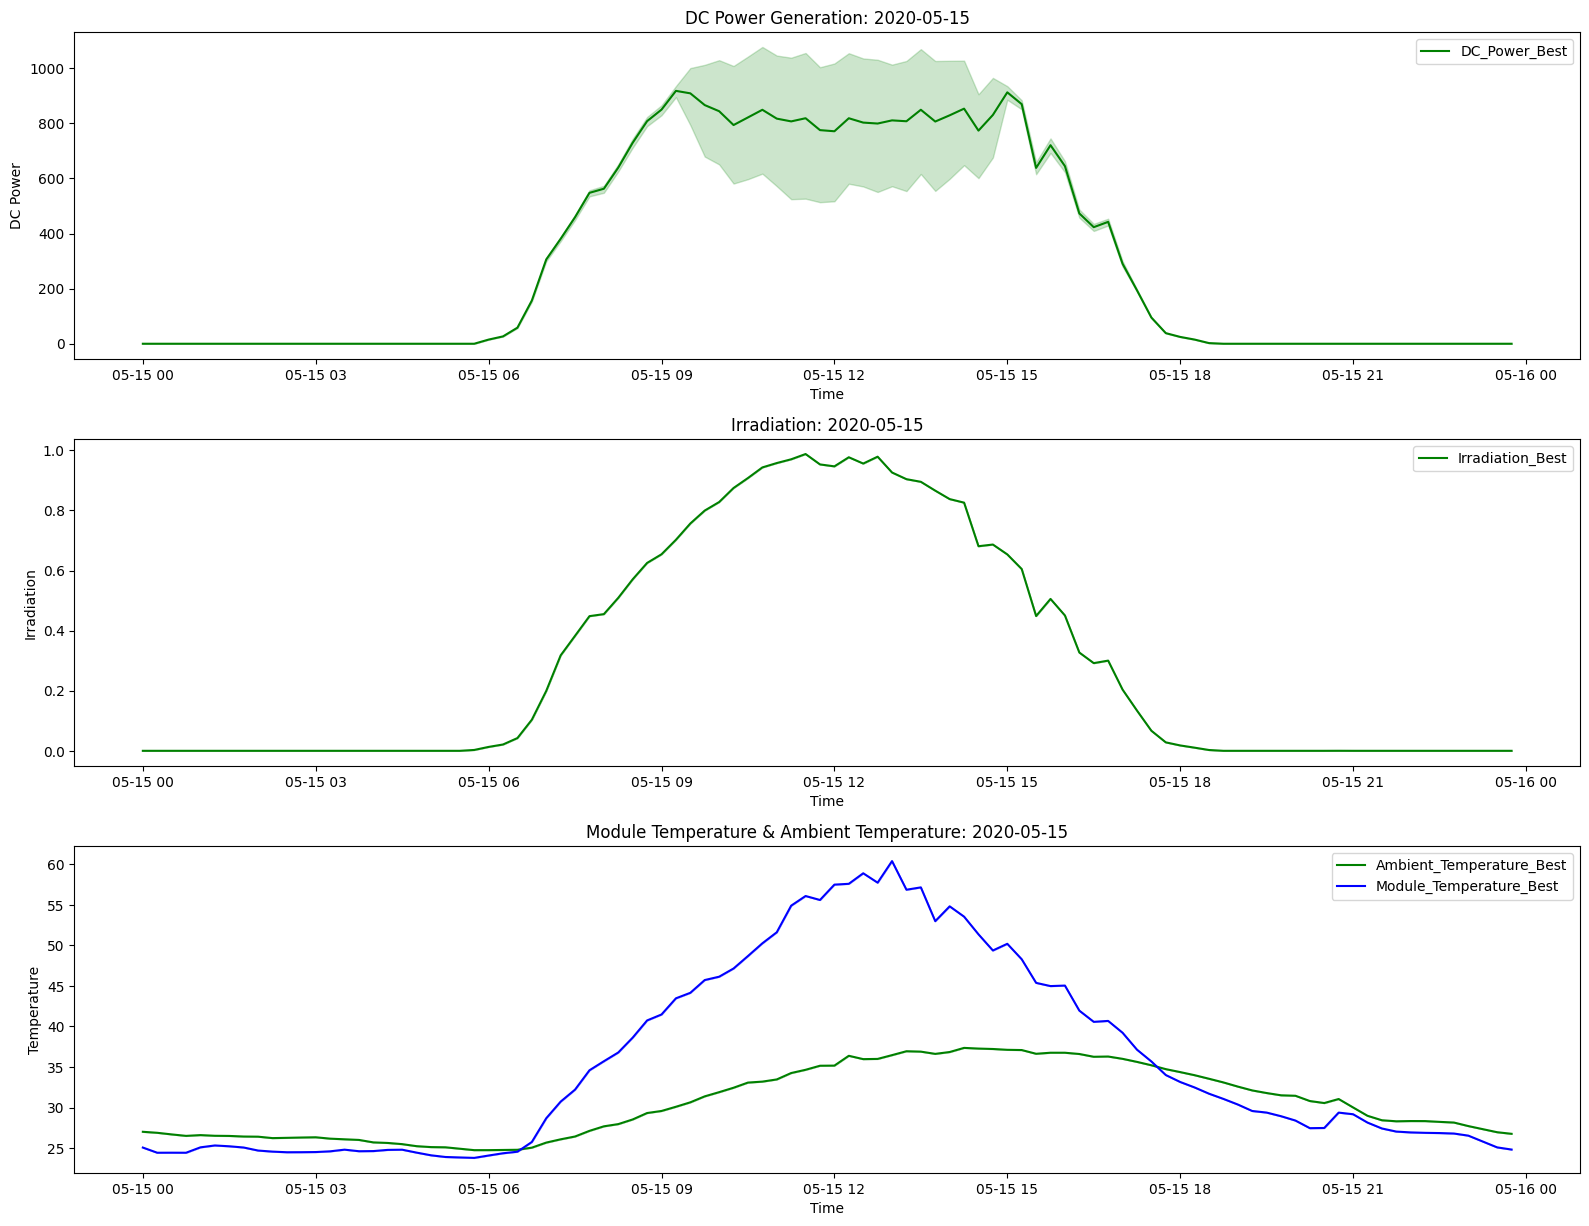

In [30]:

# Define the date of interest
date = ["2020-05-15"]

# Set the figure size
plt.figure(figsize=(16, 16))

# Plot DC Power Generation
plt.subplot(411)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"] == date[0]].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"] == date[0]].DC_POWER,
             label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))
plt.xlabel('Time')
plt.ylabel('DC Power')

# Plot Irradiation
plt.subplot(412)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"] == date[0]].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"] == date[0]].IRRADIATION,
             label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))
plt.xlabel('Time')
plt.ylabel('Irradiation')

# Plot Module and Ambient Temperatures
plt.subplot(413)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"] == date[0]].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"] == date[0]].AMBIENT_TEMPERATURE,
             label="Ambient_Temperature_Best", color='green')
sns.lineplot(x=df_solar[df_solar["DATE_STRING"] == date[0]].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"] == date[0]].MODULE_TEMPERATURE,
             label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))
plt.xlabel('Time')
plt.ylabel('Temperature')

# Improve layout
plt.tight_layout()
plt.show()

NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.

10. Lowest average DC_POWER is generated on "2020-06-11"

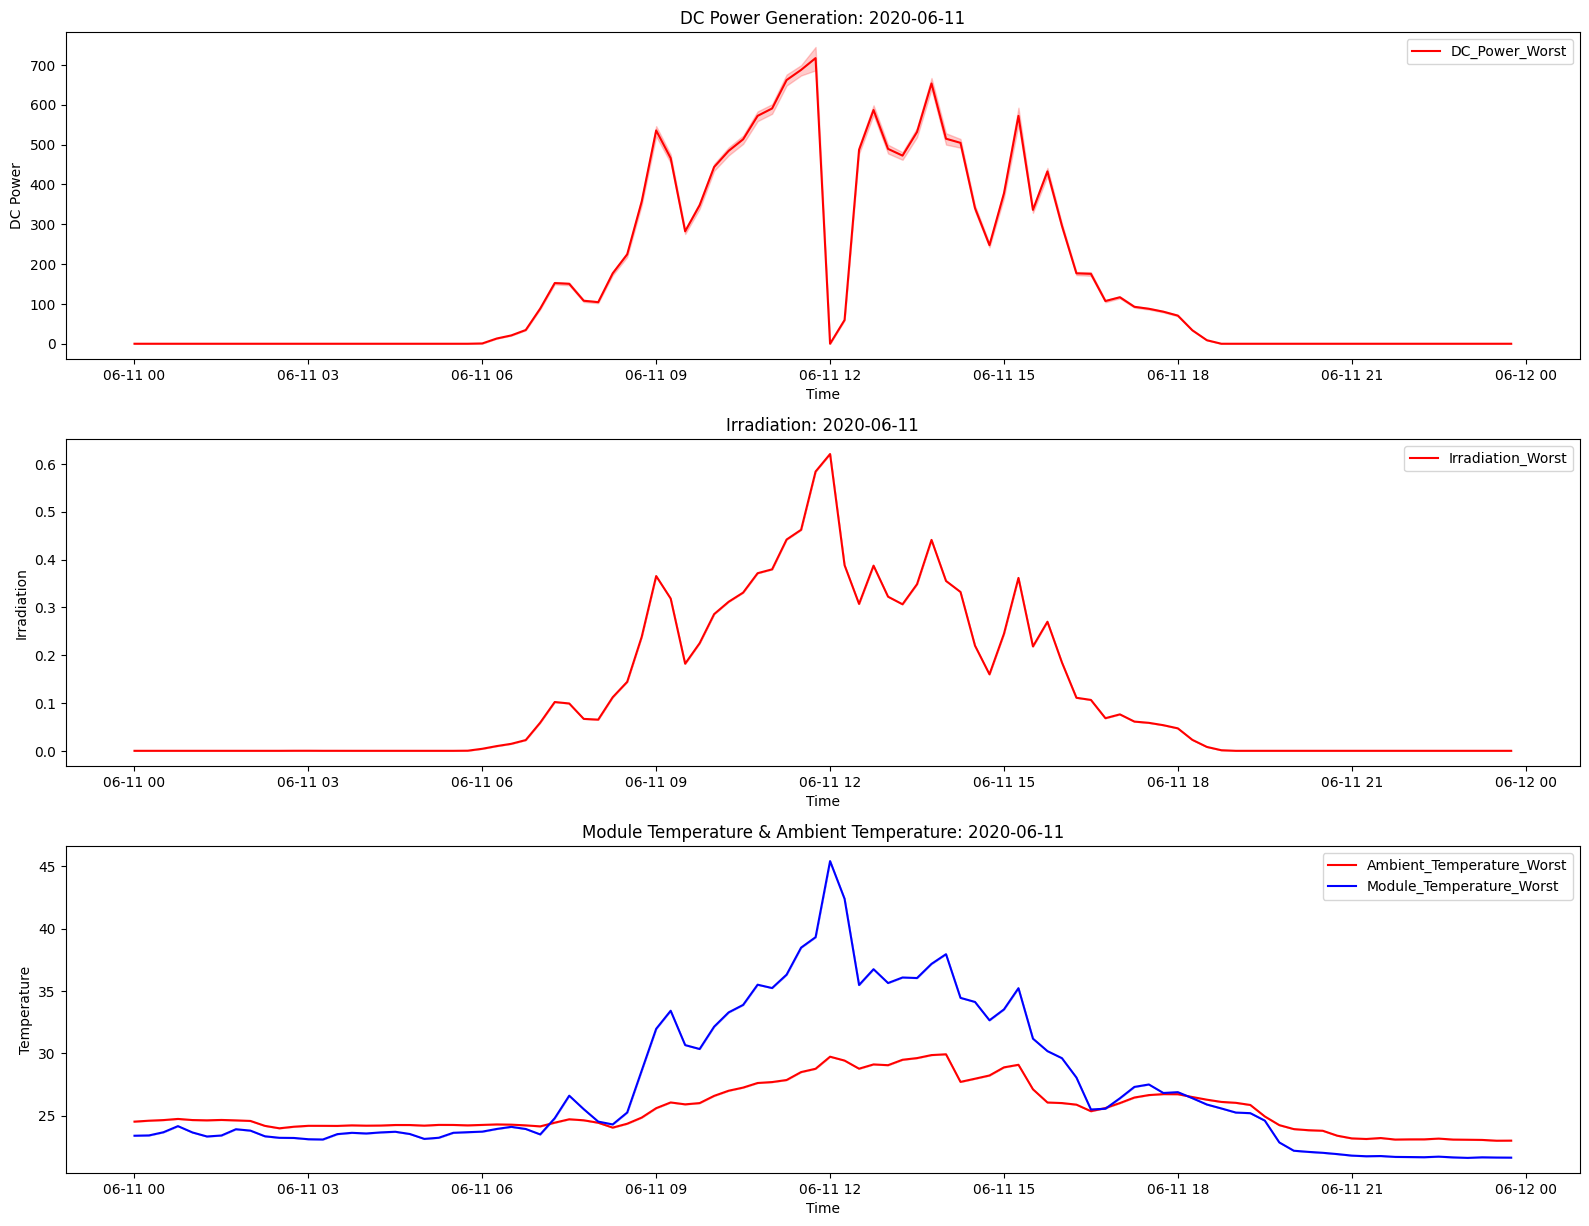

In [32]:
# Define the date of interest
date = ["2020-06-11"]

# Set the figure size
plt.figure(figsize=(16, 16))

# Plot DC Power Generation
plt.subplot(411)
sns.lineplot(x='DATE_TIME', y='DC_POWER',
             data=df_solar[df_solar["DATE_STRING"] == date[0]],
             label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))
plt.xlabel('Time')
plt.ylabel('DC Power')

# Plot Irradiation
plt.subplot(412)
sns.lineplot(x='DATE_TIME', y='IRRADIATION',
             data=df_solar[df_solar["DATE_STRING"] == date[0]],
             label="Irradiation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))
plt.xlabel('Time')
plt.ylabel('Irradiation')

# Plot Ambient and Module Temperatures
plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE',
             data=df_solar[df_solar["DATE_STRING"] == date[0]],
             label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE',
             data=df_solar[df_solar["DATE_STRING"] == date[0]],
             label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))
plt.xlabel('Time')
plt.ylabel('Temperature')

# Improve layout
plt.tight_layout()
plt.show()

NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph

Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:

1. At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt.

2. And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

3. Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced.

The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system

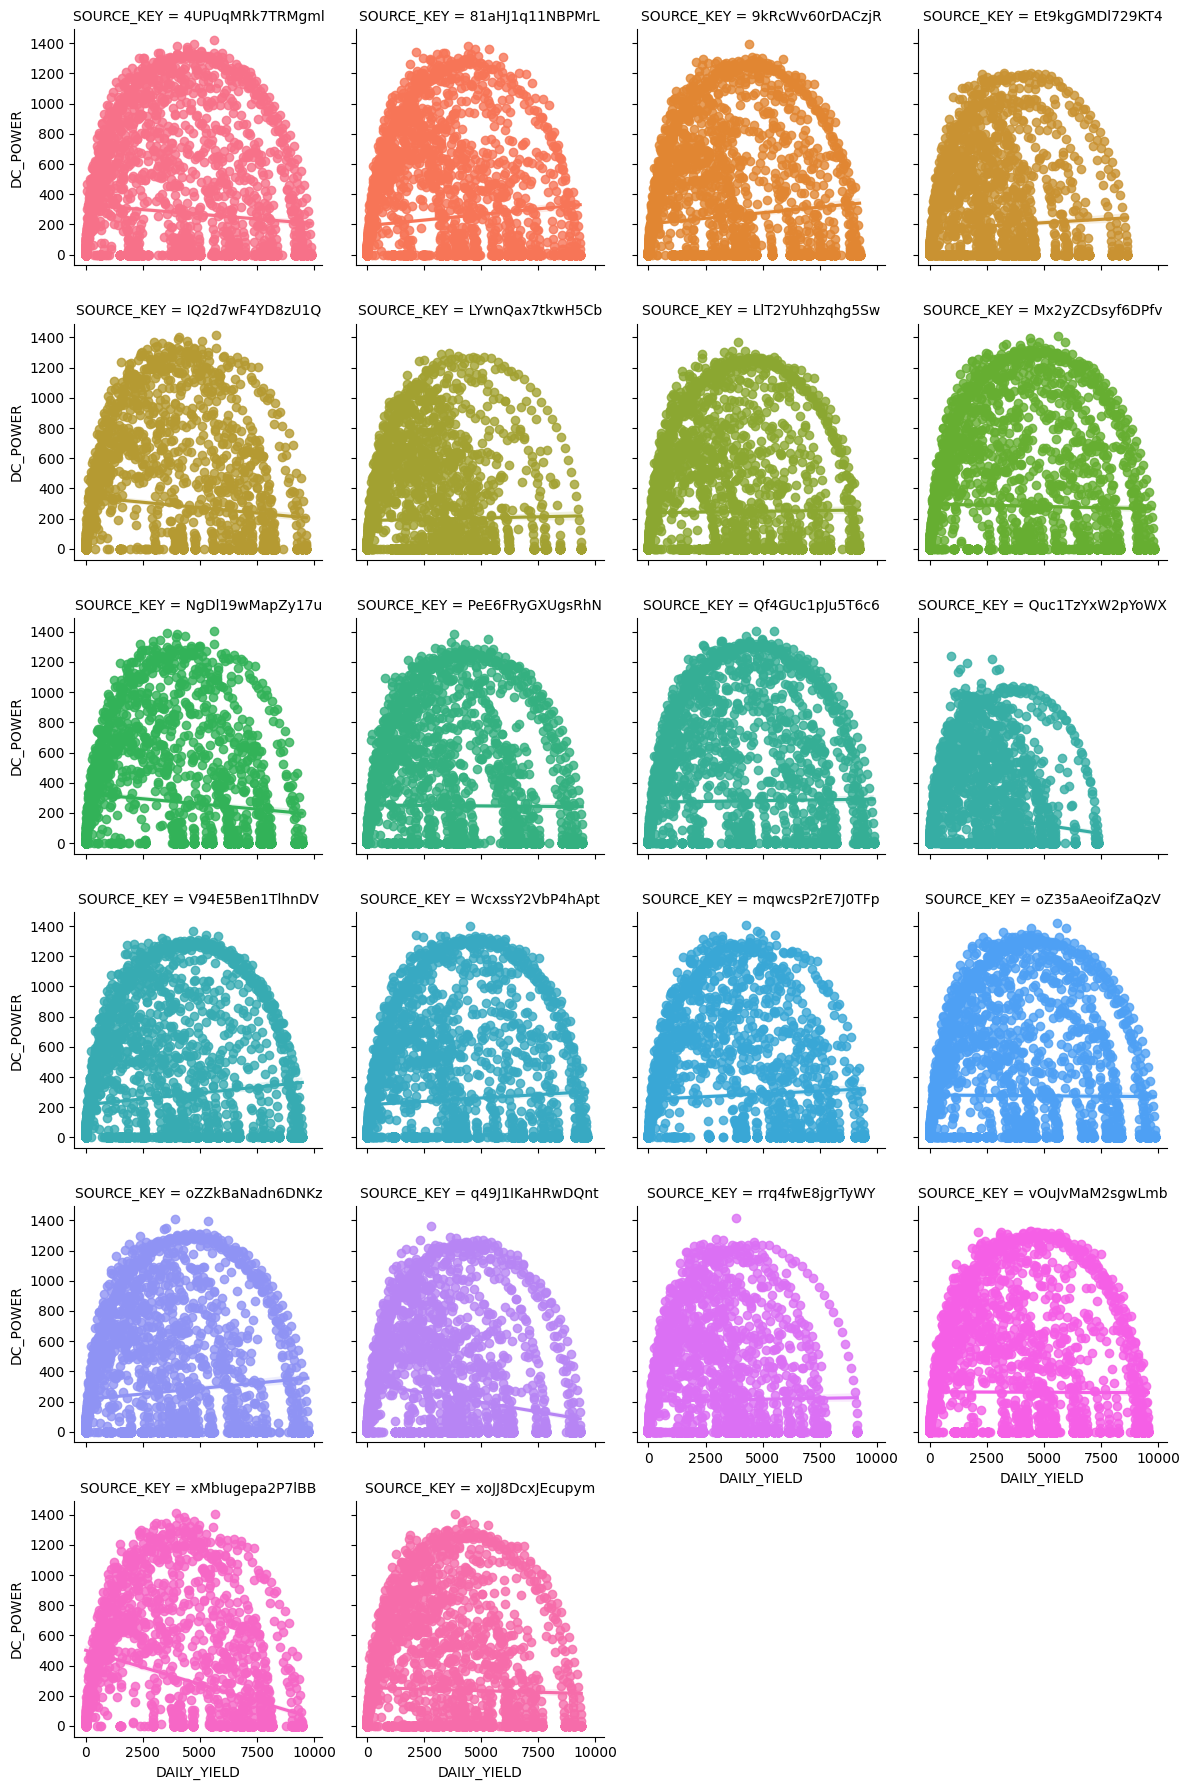

In [34]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

##Solar Power Plant Inverter Efficiency Calculation

In [35]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [36]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [37]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [38]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

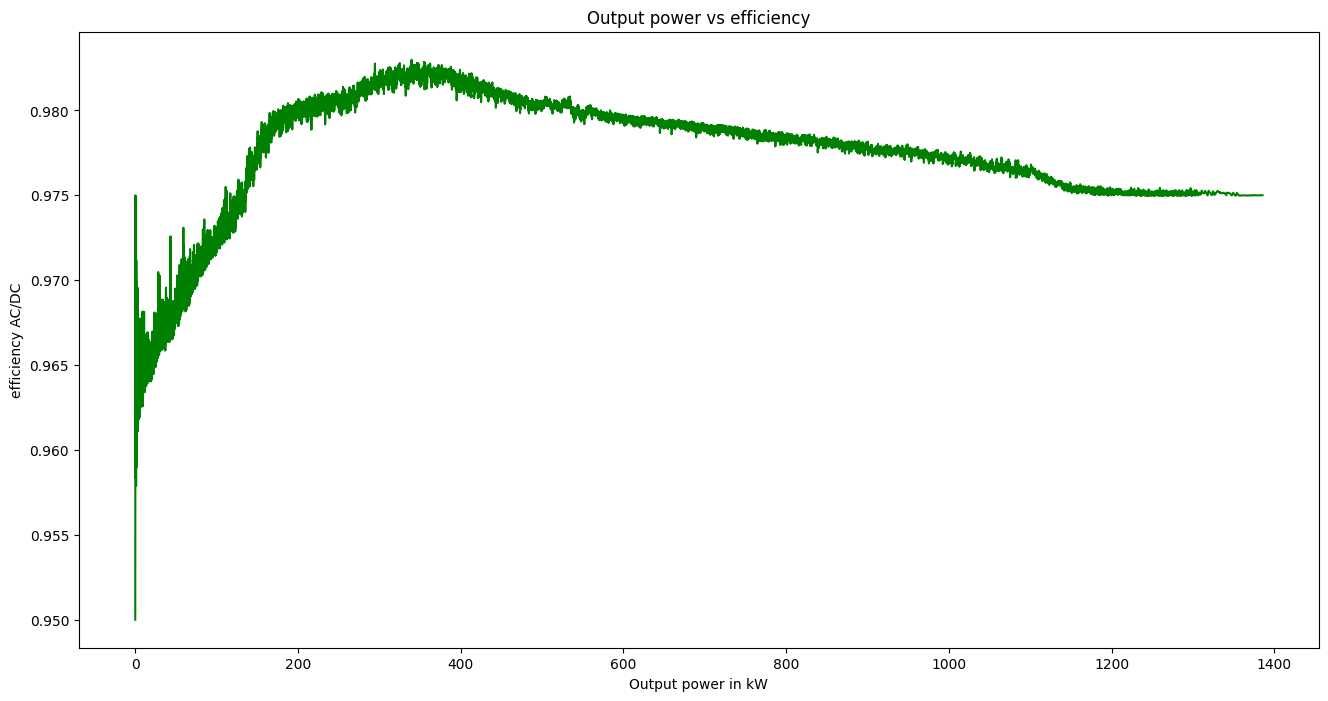

In [39]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

11. What does inverter efficiency mean?

In fact, we shall discuss here the general power inverter efficiency whether it’s solar inverter or pure sine wave inverter or even modified sine wave inverter.

The inverter efficiency refers to how much dc power will be converted to ac power, as some of power will be lost during this transition in two forms:

Heat loss.

Stand-by power which consumed just to keep the inverter in power mode. Also, we can refer to it as inverter power consumption at no load condition.

Hence, inverter efficiency = pac/pdc where pac refers to ac output power in watt and pdc refers to dc input power in watts.

For the two basic inverters types in the market, the typical efficiency of high-quality pure sine wave inverter varied from 90% to 95% and for low quality modified sine wave inverter, it varied from 75% to 85%.

This power inverter efficiency value depends on inverter load power capacity variation, as the efficiency increases and may reach to its max value at higher load power capacity in compare to lower loading power capacity, and in condition that not going above inverter output power capacity limit. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us harvest larger efficiency, which means larger inverter ac output power for the same dc input power.

##Solar Power Prediction

In [40]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [41]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [42]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

1. LinearRegression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


2. RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


3. DecisionTreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


12. Result Prediction

In [48]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.70892857 ...    0.         1007.16795714
    0.        ]


In [49]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000,0.000
50974,0.000,0.000
53919,684.913,684.709
2384,0.000,0.000
22014,0.000,0.000


In [50]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000,0.000,0.000
50974,0.000,0.000,0.000
53919,684.913,684.709,0.204
2384,0.000,0.000,0.000
22014,0.000,0.000,0.000


In [51]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
55975,257.306667,257.117614,0.189052
65764,0.000000,0.000000,0.000000
64942,208.726667,208.755633,-0.028967
26457,744.164286,745.180929,-1.016643
24783,1083.642857,1082.641090,1.001767
9300,347.980000,347.865133,0.114867
58580,572.964286,573.292605,-0.328319
49227,12.421429,12.427843,-0.006414
62253,0.000000,0.000000,0.000000
14752,1019.480000,1019.268090,0.211910
